In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import random
import copy
import operator

In [ ]:
# reading the file
df = pd.read_json("train.json")
df_ingredients = df['ingredients'].tolist()
total_recipes = len(df.index)
index = df.index
number_of_rows = len(index)

In [ ]:
# creating the nature basket
NB = []
for ingredient_list in df_ingredients:
  for ingredient in ingredient_list:
    if ingredient in NB:
      pass
    else:
      NB.append(ingredient)
total_ingredients = len(NB)

# assigning the fitness values
fitness_value = random.sample(range(0,total_ingredients),total_ingredients)

In [ ]:
# creating the kitchen basket
KB = random.sample(NB, 50)

# taking random recipes from the given dataset
recipes = df.sample(n = 500)

# all components of primordial cuisine are extracted

In [ ]:
def calculate_delta(KB,recipes):
  return len(KB)/len(recipes.index)

def is_same(to_check):
  for index, row in recipes.iterrows():
    if row['ingredients']==to_check:
      return True
  return False

def get_fitnessValue(ing):
  index = NB.index(ing)
  return fitness_value[index]

def add_ingredient(recipes):
  recipe_size = 1000
  modification_recipe = 'temp'
  while recipe_size>10:
    modification_recipe = recipes.sample()
    recipe_size = len(modification_recipe['ingredients'].tolist()[0])
  modification_recipe_id = int(modification_recipe['id'])
  modification_recipe_ingredients = modification_recipe['ingredients'].tolist()[0]

  ingredient_to_add = modification_recipe_ingredients[0]

  while ingredient_to_add in modification_recipe_ingredients:
    ingredient_to_add = random.sample(KB,1)
    ingredient_to_add = ingredient_to_add[0]

  to_check = copy.deepcopy(modification_recipe_ingredients)
  to_check.append(ingredient_to_add)

  return_list = [to_check, modification_recipe_id, ingredient_to_add]
  return return_list

def delete_ingredient(recipes,how):
  recipe_size = 0
  modification_recipe = 'temp'
  while recipe_size<=10:
    modification_recipe = recipes.sample()
    recipe_size = len(modification_recipe['ingredients'].tolist()[0])
  modification_recipe_id = int(modification_recipe['id'])
  modification_recipe_ingredients = modification_recipe['ingredients'].tolist()[0]

  ingredient_to_delete = 'temp'

  if how==0:
    fit_val = get_fitnessValue(modification_recipe_ingredients[0])
    ingredient_to_delete = modification_recipe_ingredients[0]
    for i in range(len(modification_recipe_ingredients)):
      if i!=0:
        temp = get_fitnessValue(modification_recipe_ingredients[i])
        if fit_val>temp:
          fit_val = temp
          ingredient_to_delete = modification_recipe_ingredients[i]
  else:
    ingredient_to_delete = random.sample(modification_recipe_ingredients,1)
    ingredient_to_delete = ingredient_to_delete[0]

  to_check = copy.deepcopy(modification_recipe_ingredients) 
  to_check.remove(ingredient_to_delete)
  return_list = [to_check, modification_recipe_id]
  return return_list
  
def replace_ingredient(recipes):
  modification_recipe = recipes.sample()
  modification_recipe_id = int(modification_recipe['id'])
  modification_recipe_ingredients = modification_recipe['ingredients'].tolist()[0]

  ingredient_from_recipe = ['a']
  ingredient_from_KB = ['a']

  # picking up random ingredient from the chosen recipe and the KB to modify the recipe
  while ingredient_from_recipe[0]==ingredient_from_KB[0]:
    # print("hello")
    ingredient_from_recipe = random.sample(modification_recipe_ingredients,1)
    ingredient_from_KB = random.sample(KB,1)
  
  ingredient_from_recipe = ingredient_from_recipe[0]
  ingredient_from_KB = ingredient_from_KB[0]

  index = modification_recipe_ingredients.index(ingredient_from_recipe)

  # replacing the ingredient of the recipe with ingredient chosen from KB

  to_check = copy.deepcopy(modification_recipe_ingredients) 
  to_check[index] = ingredient_from_KB
  return_list = [to_check, modification_recipe_id, ingredient_from_KB]
  return return_list

def plot_recipeSize():
  size = {}
  for index, row in recipes.iterrows():
    ingredients = row['ingredients']
    length = len(ingredients)
    if length in size:
      size[length] = size[length]+1
    else:
      size[length] = 1
  
  sorted_list = sorted(size.keys())
  y_list = []
  total = 0
  for r in sorted_list:
    y_list.append(size[r])
    total = total+size[r]
    # Plotting every cuisine
  for i in range(len(y_list)):
    y_list[i] = y_list[i]/total
  x_axis = sorted_list
  y_axis = y_list
  plt.plot(x_axis, y_axis)
  plt.xlabel("Recipe size")
  plt.ylabel("Percentage")
  plt.title("Recipe Size Distribution for each cuisine")
  plt.show()

def plot_frequencyRank():
  d = {}
  for index,row in recipes.iterrows():
    ingredients = row['ingredients']
    for i in ingredients:
      if i in d:
        d[i] = d[i]+1
      else:
        d[i] = 1
  sorted_matrix = sorted(d.items(),key=operator.itemgetter(1),reverse=True)
  sorted_dict = {}

  for i in range(len(sorted_matrix)):
    sorted_dict[i] = sorted_matrix[i][1]

# print(sorted_dict)
  x_axis = list(sorted_dict.keys())
  y_axis = list(sorted_dict.values())

# Line plot
  plt.loglog(x_axis,y_axis, label = "frequency rank distribution")
  plt.legend()
  plt.xlabel("Rank")
  plt.ylabel("Frequency")
  plt.title("Frequency Rank Distribution for all recipes")
  plt.show()

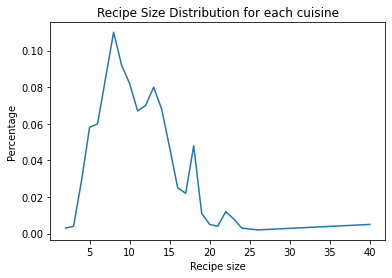

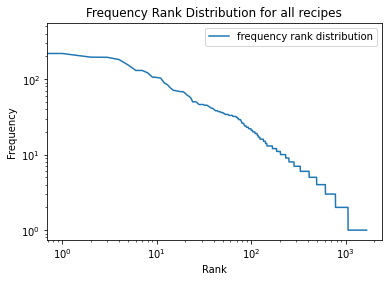

1000


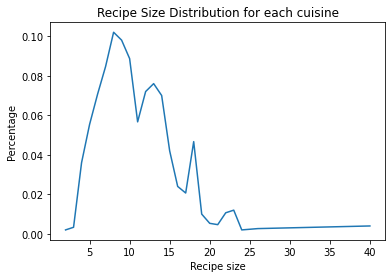

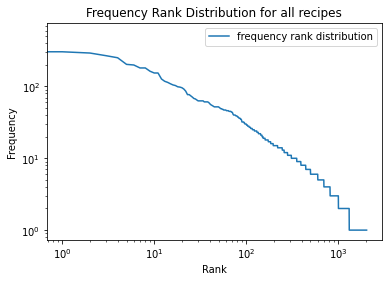

1500


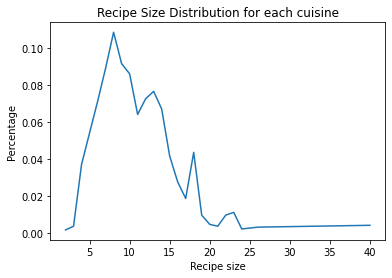

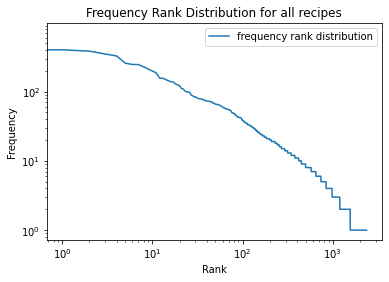

2000


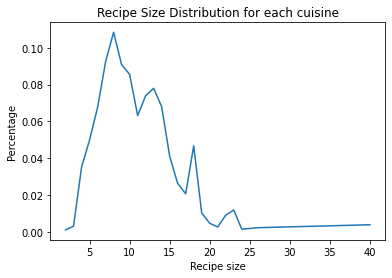

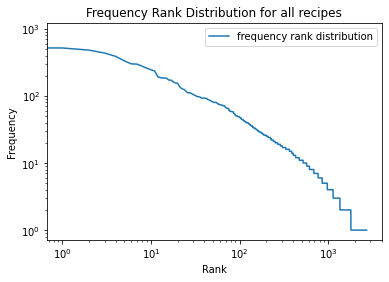

2500


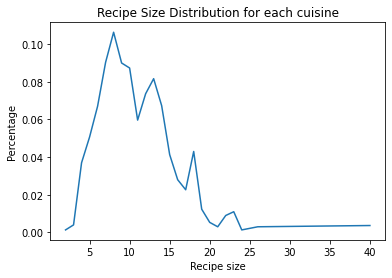

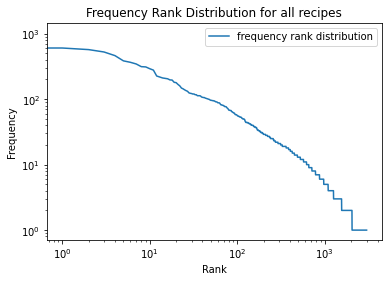

3000


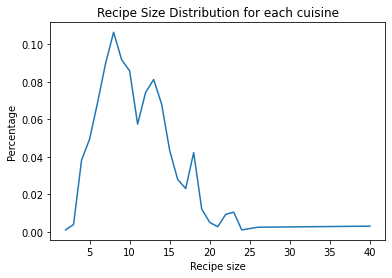

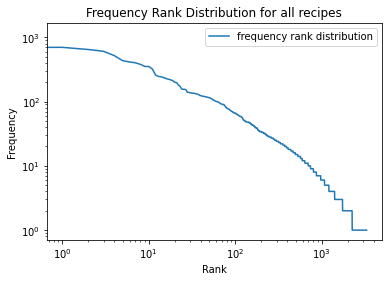

3500


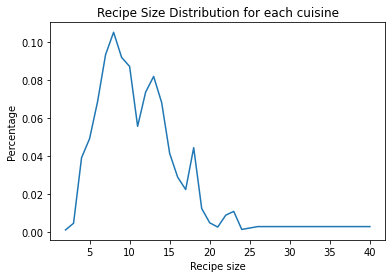

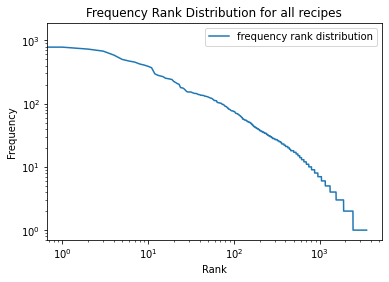

4000


In [78]:
# Question 1
num_epoch = 7

# at each epoch number of recipes = 5000 and total number of recipess in the cuisine = 35000

for i in range(num_epoch):
  j = 0
  while j<500:
    l = replace_ingredient(recipes)
    if is_same(l[0])==False:
      row_number = recipes[recipes['id'] == l[1]].index[0]
      cuisine = recipes.loc[row_number,'cuisine']
      to_append = pd.DataFrame({'id':[number_of_rows+1], 'cuisine':[cuisine], 'ingredients':[l[0]]})
      number_of_rows = number_of_rows+1
      recipes = recipes.append(to_append)
      j = j+1
      KB.remove(l[2])
      delta = calculate_delta(KB,recipes)
      if delta<0.1:
        while delta<0.1:
          while 0<1:
            ingredient = random.sample(NB,1)
            ingredient = ingredient[0]
            if ingredient in KB:
              continue
            else:
              break
          KB.append(ingredient)
          delta = calculate_delta(KB,recipes)        
  plot_recipeSize()
  plot_frequencyRank()
  print(len(recipes.index))

In [79]:
# creating the kitchen basket
KB = random.sample(NB, 50)

# taking random recipes from the given dataset
recipes = df.sample(n = 500)

# all components of primordial cuisine are extracted

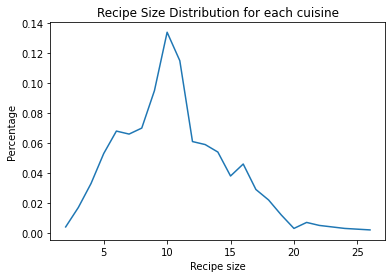

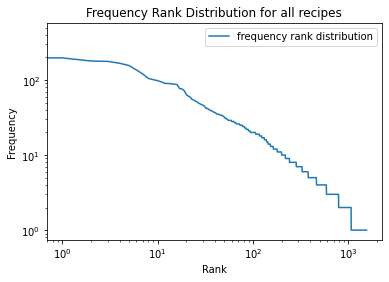

1000


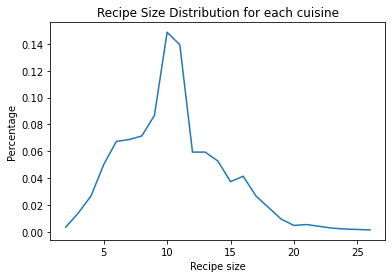

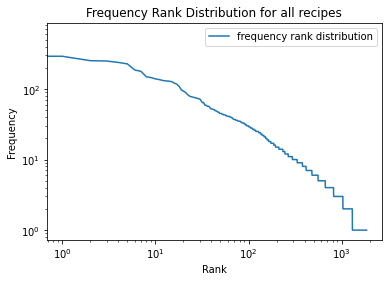

1500


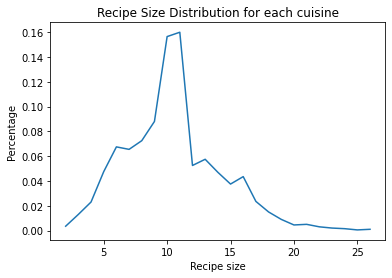

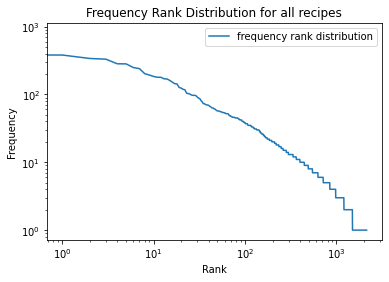

2000


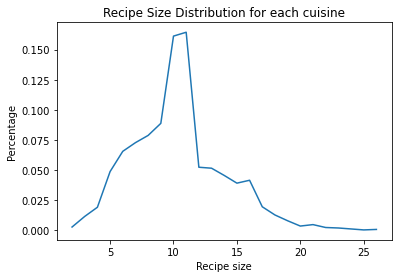

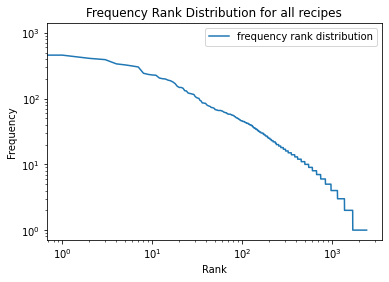

2500


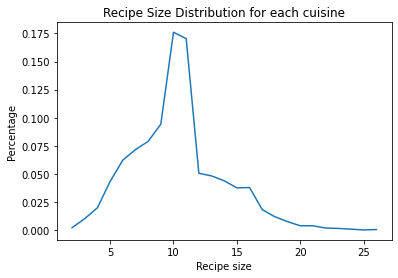

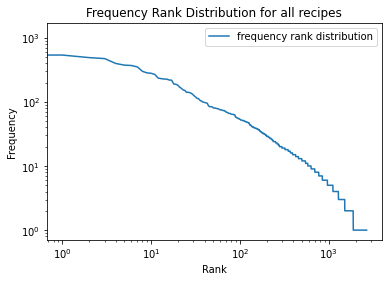

3000


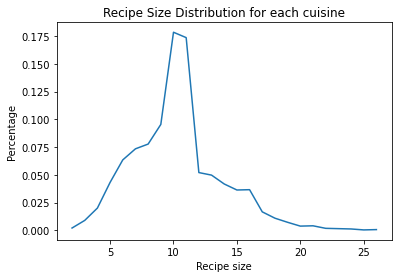

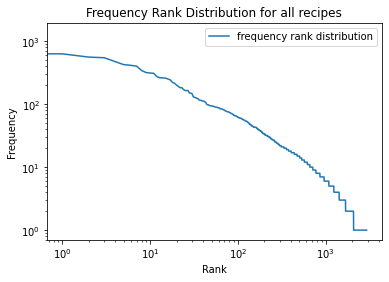

3500


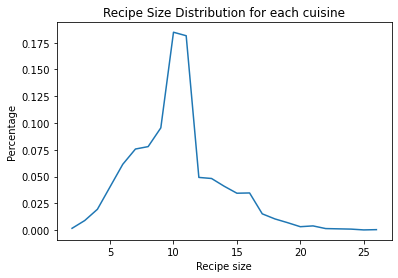

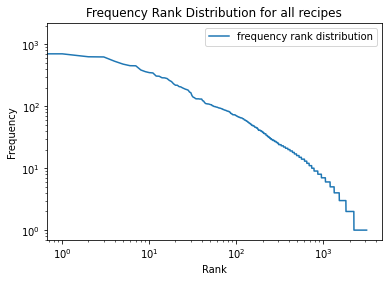

4000


In [80]:
# Question 2
num_epoch = 7
operation_list = [1,2,3]

for i in range(num_epoch):
  j = 0
  while j<500:
    operation = random.choice(operation_list)
    if operation==1:
      l = replace_ingredient(recipes)
      if is_same(l[0])==False:
        row_number = recipes[recipes['id'] == l[1]].index[0]
        cuisine = recipes.loc[row_number,'cuisine']
        to_append = pd.DataFrame({'id':[number_of_rows+1], 'cuisine':[cuisine], 'ingredients':[l[0]]})
        number_of_rows = number_of_rows+1
        recipes = recipes.append(to_append)
        j = j+1
        KB.remove(l[2])
        delta = calculate_delta(KB,recipes)
        if delta<0.1:
          while delta<0.1:
            while 0<1:
              ingredient = random.sample(NB,1)
              ingredient = ingredient[0]
              if ingredient in KB:
                continue
              else:
                break
            KB.append(ingredient)
            delta = calculate_delta(KB,recipes) 
    elif operation == 2:
      l = delete_ingredient(recipes,0)
      if is_same(l[0])==False:
        row_number = recipes[recipes['id'] == l[1]].index[0]
        cuisine = recipes.loc[row_number,'cuisine']
        to_append = pd.DataFrame({'id':[number_of_rows+1], 'cuisine':[cuisine], 'ingredients':[l[0]]})
        number_of_rows = number_of_rows+1
        recipes = recipes.append(to_append)
        j = j+1
    else:
      l = add_ingredient(recipes)
      if is_same(l[0])==False:
        row_number = recipes[recipes['id'] == l[1]].index[0]
        cuisine = recipes.loc[row_number,'cuisine']
        to_append = pd.DataFrame({'id':[number_of_rows+1], 'cuisine':[cuisine], 'ingredients':[l[0]]})
        number_of_rows = number_of_rows+1
        recipes = recipes.append(to_append)
        j = j+1
        KB.remove(l[2])
        delta = calculate_delta(KB,recipes)
        if delta<0.1:
          while delta<0.1:
            while 0<1:
              ingredient = random.sample(NB,1)
              ingredient = ingredient[0]
              if ingredient in KB:
                continue
              else:
                break
            KB.append(ingredient)
            delta = calculate_delta(KB,recipes) 
  plot_recipeSize()
  plot_frequencyRank()
  print(len(recipes.index))